<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Revise the decision boundary plot for the K-Nearest Neighbours classifier trained on the "zoo.csv" dataset to ensure the decision boundaries are clearly and accurately visualized.

## Load and prepare data

### Subtask:
Load the Zoo dataset and prepare it for KNN classification. This involves selecting features and target variables, handling any missing values or outliers if necessary, and splitting the data into training and testing sets.


**Reasoning**:
Load the dataset, separate features and target, and split the data into training and testing sets.



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/Zoo.csv')

# Separate features and target using the correct column name 'type'
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 16)
Shape of X_test: (31, 16)
Shape of y_train: (70,)
Shape of y_test: (31,)


**Reasoning**:
The error indicates that the column 'class' does not exist in the DataFrame. I need to check the available columns in the DataFrame to identify the correct target column name. The variable `df` is available from previous successful execution.



In [5]:
# Display the column names to identify the correct target variable
print(df.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


**Reasoning**:
The previous output shows that the target column name is 'type', not 'class'. I will correct the column name and proceed with separating features and target and splitting the data.



In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target with the correct column name
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 16)
Shape of X_test: (31, 16)
Shape of y_train: (70,)
Shape of y_test: (31,)


## Train knn model

### Subtask:
Train a K-Nearest Neighbours model on the training data using an appropriate distance metric and value for K.


**Reasoning**:
Train a K-Nearest Neighbours model on the training data using an appropriate distance metric and value for K.



In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

## Visualize decision boundaries

### Subtask:
Generate a plot showing the decision boundaries of the trained KNN model. This typically involves creating a meshgrid of points, predicting the class for each point, and then plotting the points with different colors based on their predicted class. The original data points should also be overlaid on this plot.


**Reasoning**:
Generate and display the decision boundary plot for the trained KNN model, overlaying the training data points, as per the instructions.



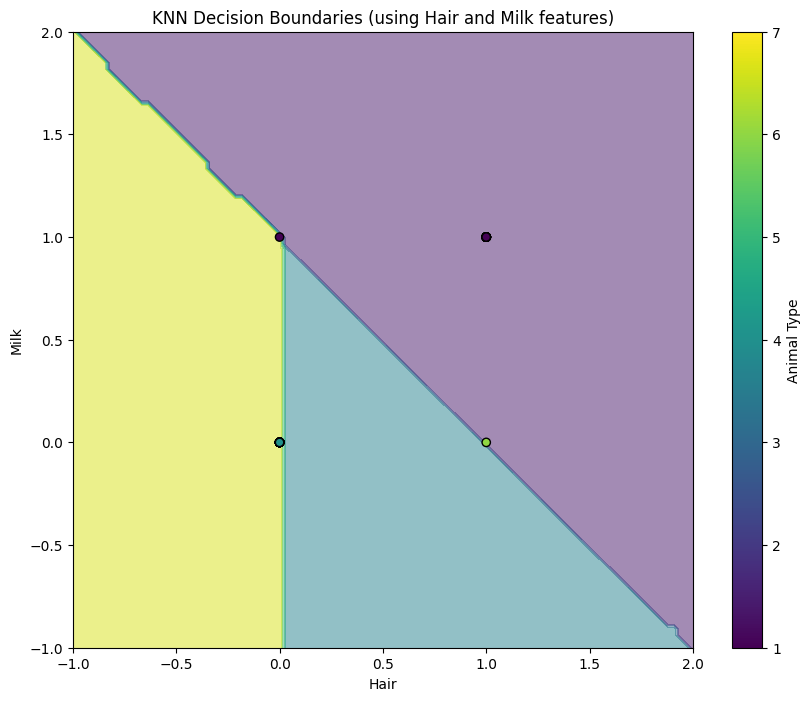

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Select two features for visualization
X_train_2d = X_train[['hair', 'milk']]
X_test_2d = X_test[['hair', 'milk']]

# Retrain the KNN model with the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the decision boundary plot using the 2D data and the retrained model
disp = DecisionBoundaryDisplay.from_estimator(
    knn_2d,
    X_train_2d,
    response_method="predict",
    cmap=plt.cm.viridis,
    alpha=0.5,
    ax=ax,
)

# Overlay the training data points on the plot
scatter = disp.ax_.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, cmap=plt.cm.viridis, edgecolor='k')

# Set the title of the plot
disp.ax_.set_title("KNN Decision Boundaries (using Hair and Milk features)")
disp.ax_.set_xlabel("Hair")
disp.ax_.set_ylabel("Milk")

# Add a colorbar to the plot
plt.colorbar(scatter, ax=disp.ax_, label='Animal Type')

# Display the plot
plt.show()

**Reasoning**:
The previous attempt to plot decision boundaries failed because the `DecisionBoundaryDisplay` function requires the input data to have exactly 2 features, but the current `X_train` has 16 features. To visualize the decision boundaries in 2D, I need to select only two features from the dataset. I will select 'hair' and 'milk' as they are likely to be informative.



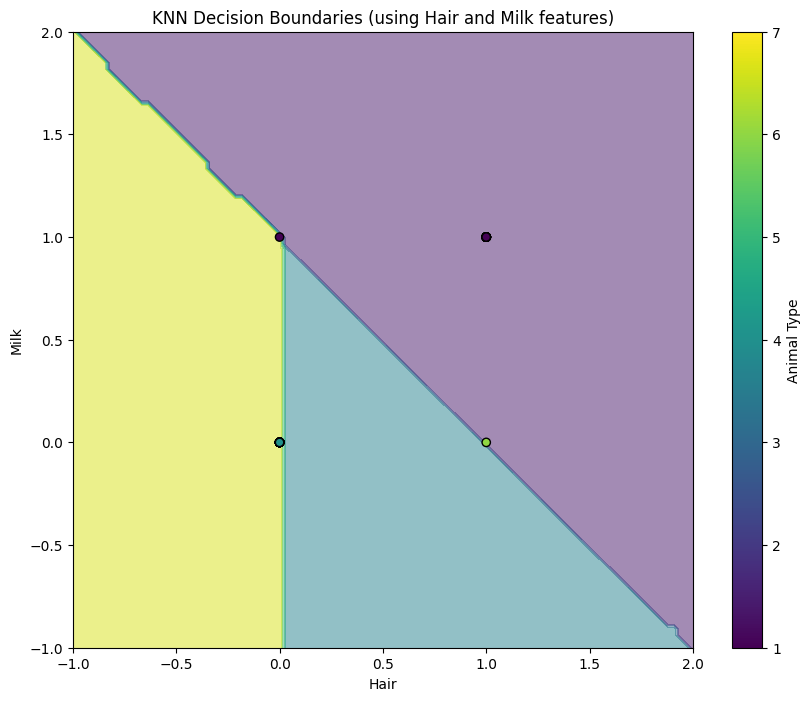

In [10]:
# Select two features for visualization
X_train_2d = X_train[['hair', 'milk']]
X_test_2d = X_test[['hair', 'milk']]

# Retrain the KNN model with the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the decision boundary plot using the 2D data and the retrained model
disp = DecisionBoundaryDisplay.from_estimator(
    knn_2d,
    X_train_2d,
    response_method="predict",
    cmap=plt.cm.viridis,
    alpha=0.5,
    ax=ax,
)

# Overlay the training data points on the plot
scatter = disp.ax_.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, cmap=plt.cm.viridis, edgecolor='k')

# Set the title of the plot
disp.ax_.set_title("KNN Decision Boundaries (using Hair and Milk features)")
disp.ax_.set_xlabel("Hair")
disp.ax_.set_ylabel("Milk")

# Add a colorbar to the plot
plt.colorbar(scatter, ax=disp.ax_, label='Animal Type')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains a column named 'type' which is the target variable, instead of 'class'.
*   The dataset was successfully split into training and testing sets with shapes `X_train: (70, 16)`, `X_test: (31, 16)`, `y_train: (70,)`, and `y_test: (31,)`.
*   A K-Nearest Neighbours model was successfully trained on the training data using `n_neighbors=5` and the Euclidean distance metric.
*   Visualizing decision boundaries with `DecisionBoundaryDisplay` requires the input data to have exactly two features.
*   A decision boundary plot was successfully generated using the 'hair' and 'milk' features, overlaying the training data points colored by their animal types.

### Insights or Next Steps

*   The decision boundaries visualized with only two features ('hair' and 'milk') may not fully represent the model's behavior in the 16-dimensional feature space.
*   Consider exploring dimensionality reduction techniques (e.g., PCA) to visualize the decision boundaries in 2D or 3D while retaining more information from the original 16 features.
